In [1]:
import pandas as pd
import numpy as np
#import geopandas as gdp
#from shapely.geometry import line
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.widgets import Cursor, Button
from collections import Counter         
from matplotlib import pyplot as plt

IMPORT BRUCE CATALOGUE & HISTORICAL CATALOGUE

In [2]:
bruce_cat = pd.read_csv("0.Bruce_Cat1.csv")   # Import CSV  to bruce data frame
hist_cat = pd.read_csv('EQ_Catalogue_Nicol_Identified_Active_Fault.csv')
zone =0

INPUT PARAMATERS

In [3]:
start_year_hist = 1840
end_year_hist = 2010
start_year_simu = 0
end_year_simu = 185000
min_magnitude = 7.3
max_magnitude = 9.0
magnitude_bin = 0.1 
MFD_reduction_factor1 = 1
MFD_reduction_factor2 = 1
year_bin = end_year_hist - start_year_hist

PLOTTING INPUT PARAMATERS

In [4]:
x_lower_limit = 7.3
x_upper_limit = 9.0
y_lower_limit = 0.0001
y_upper_limit = 1
image_resolution = 500
fig_size_x = 7
fig_size_y = 4
lineweight_1 = 1
lineweight_2 = 1
lineweight_3 = 1
lineweight_4 = 0.1
grid_linewidth = 0.2

In [5]:
bruce_cat['year'] = bruce_cat['t0']/(365*24*60*60)
bruce_cat.head(2)

,FID,ID,t0,m0,mw,x,y,z,area,dt,year
0,0,0,668092957.4,1.260000e+16,4.666845,192217.1495,5008104.809,-3200.0,8.431968e+05,0.497987,21.185089
1,1,1,741329352.5,1.210000e+17,5.322428,195970.3034,5005539.900,-11700.0,5.283251e+06,1.352069,23.507400


In [6]:
bruce_cat.sort_values(by='year', ascending=True, inplace = True, na_position ='last')
bruce_cat.drop(bruce_cat.tail(2).index,inplace=True)
bruce_cat.head(5)
#bruce_cat.tail()

,FID,ID,t0,m0,mw,x,y,z,area,dt,year
0,0,0,668092957.4,1.260000e+16,4.666845,192217.1495,5008104.809,-3200.000000,8.431968e+05,0.497987,21.185089
1,1,1,741329352.5,1.210000e+17,5.322428,195970.3034,5005539.900,-11700.000000,5.283251e+06,1.352069,23.507400
2,2,2,741337193.1,3.980000e+16,4.999647,194182.0690,5008093.764,-6300.000000,1.761084e+06,0.752610,23.507648
3,3,3,796316283.3,1.060000e+16,4.615724,157555.9966,4969335.477,-3208.333333,7.577722e+05,0.464437,25.251024
4,4,4,816147061.7,8.100000e+16,5.205699,195965.8716,5006462.664,-10800.000000,3.522168e+06,1.073011,25.879854


In [7]:
filter = ((bruce_cat['year']>= start_year_simu) & (bruce_cat['year']<=end_year_simu) & (bruce_cat['mw'] >=min_magnitude))
bruce_cat = bruce_cat[filter]
#hist.head(3)
#hist.count()
bruce_cat.head(4)

,FID,ID,t0,m0,mw,x,y,z,area,dt,year
88,88,88,2.669222e+09,1.470000e+21,8.044579,192217.1495,5008104.809,-3200.0,8.384824e+09,312.979064,84.640489
483,483,483,8.432838e+09,3.630000e+20,7.640094,650656.8662,5286424.699,-12000.0,1.480927e+09,50.332445,267.403543
499,499,499,8.634518e+09,3.510000e+20,7.630247,625353.3381,5283191.349,-3000.0,1.945293e+09,51.274508,273.798774
528,528,528,8.895922e+09,1.760000e+20,7.430898,779797.4189,5381217.212,-12600.0,1.266745e+09,54.707819,282.087830


In [8]:
################################################################################################################################
################################################################################################################################
################################################################################################################################
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% MFD HISTORICAL CATALOGUE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [9]:
#cat1 = pd.read_csv('1.Matt_Cat1.csv')
magnitude1 = hist_cat['Mag'].tolist()   
catalogue_duration = end_year_hist - start_year_hist  #cat5['Year'].min()
MFD_reduction_factor = 1

import PhD_Otago.Magnitude_Frequency_Distribution                           ##### Import from Function
(x1,y1) = PhD_Otago.Magnitude_Frequency_Distribution.historical(magnitude1, 
                                         magnitude_bin,
                                         catalogue_duration, 
                                         min_magnitude,
                                         max_magnitude,
                                         MFD_reduction_factor
                                        )

y11 = y1
y3 = np.divide(y1,MFD_reduction_factor1) 
y5 = np.divide(y11,MFD_reduction_factor2) 

In [10]:
print(type(y11))
df = pd.DataFrame(y1,columns=['Nu/yr'])
#df['Mw'] = pd.Dataframe(10)
df.head(14)

<class 'numpy.ndarray'>


,Nu/yr
0,0.035294
1,0.029412
2,0.023529
3,0.023529
4,0.017647
5,0.017647
6,0.005882
7,0.005882
8,0.005882
9,0.005882


In [11]:
################################################################################################################################
################################################################################################################################
################################################################################################################################
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% MFD RSQSIM AVERAGED (0 - 187500 YEAR) CATALOGUE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [12]:
# Magnitude frequency distribution plot for RSQSim Start Year - End Year
magnitude2 = bruce_cat['mw']

catalogue_duration = end_year_simu - start_year_simu  #cat5['Year'].min()
MFD_reduction_factor = 1

import PhD_Otago.Magnitude_Frequency_Distribution                           ##### Import from Function
(x2,y2) = PhD_Otago.Magnitude_Frequency_Distribution.historical(magnitude2, 
                                         magnitude_bin,
                                         catalogue_duration, 
                                         min_magnitude,
                                         max_magnitude,
                                         MFD_reduction_factor
                                        )

In [13]:
################################################################################################################################
################################################################################################################################
################################################################################################################################
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% STIRLING 2010 MFD %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [14]:
MFD_reduction_factor_str = 1
Stirling_MFD = pd.read_csv('stirling_2012.csv')
Stirling_MFD.head()
x10 = Stirling_MFD['mw'].tolist()
y10 = Stirling_MFD['num'].tolist()
y10_factored = np.divide(y10,MFD_reduction_factor_str) 
#plt.semilogy(x10,y10)
print(x10)

[5.053050398, 5.286472149, 5.392572943999999, 5.572944297, 5.774535809, 5.901856764, 6.061007957999999, 6.347480106, 6.5596816979999995, 6.76127321, 6.877984085, 7.037135279, 7.153846154, 7.24933687, 7.24933687, 7.408488064, 7.535809018999999, 7.6737400529999995, 7.769230769, 7.875331565, 7.9177718829999995, 7.99204244, 8.129973475, 8.151193634, 8.204244032, 8.193633952, 8.289124668, 8.352785146, 8.384615385, 8.405835544, 8.458885942, 8.469496021, 8.49071618, 8.50132626, 8.607427056, 8.702917772000001, 9.0, 9.021220159, 9.021220159]


In [15]:
from scipy.interpolate import make_interp_spline

In [16]:
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% MFD RSQSIM AVERAGED CATALOGUE %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

<Figure size 432x288 with 0 Axes>

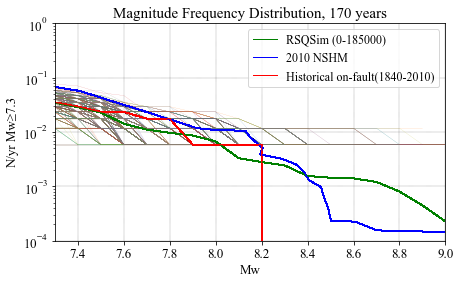

In [17]:
year_increment = end_year_hist - start_year_hist
catalogue_duration = year_increment
start_year_simu1 = start_year_simu
########################################### MATT CATALOGUE #####################
from matplotlib.font_manager import FontProperties
plt.rcParams["font.family"] = "Times New Roman"    # Font type for all 

import matplotlib.pyplot as plt

plt.rc('grid', linestyle="--", color='black',linewidth=grid_linewidth)    # This is used to draw internal grid line 

fig = plt.figure()                           
fig = plt.figure(figsize=(fig_size_x, fig_size_y))               # for size of ffigure
ax = fig.gca()
plt.title("Magnitude Frequency Distribution, %d years"%year_increment,fontsize=15)      # TITLE of Graph
plt.xlabel("Mw", fontsize=13)                               # X- axis Label
plt.ylabel("N/yr Mw≥7.3",fontsize=13)                             # Y- axis Label
plt.legend(["Observed 1940-2020","RSQSim", "Factored"])                    #Legend, 1st legend for 1st plot, refer above semi plot
plt.grid()    #To plot internal Grid
plt.xlim(x_lower_limit,x_upper_limit)
plt.ylim(y_lower_limit, y_upper_limit)
resolution_value = image_resolution
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

while start_year_simu <= end_year_simu:
    one=[]
    filter = ((bruce_cat['year']>=start_year_simu) & (bruce_cat['year']< start_year_simu+year_increment) & (bruce_cat['year']< end_year_simu))
    one = bruce_cat[filter]
    #print(one)
    #start_year_simu = start_year_simu+year_increment
    
    var4 = magnitude_bin                     # interval for moment magnitude (mw) data 
    x4 = min_magnitude                      # initial x-axis value
    mw4 = []                      # x-axis value giving array of mw with given interval
    y4 = []                        # y-axis value giving number of mw values greater than current x-axis value(i.e. mw)
    magnitude = one['mw'].tolist() 
    arr4 = np.array(magnitude) 
    MFD_reduction_factor = 1
    
    while x4<= max_magnitude:
        mw4.append(x4)             # insert increasing value of x into array of mag
        sum4 = 0                   # initialize sum as 0
        for i in arr4 :           # this loop gives the sum of number of mag greater than current mag value
            if i >= x4 :
                sum4 = sum4 + 1
             
        y4.append(sum4)             # insert calculated sum from above loop in y-axis
        x4 = x4 + var4
    
    year = catalogue_duration            # Year for the period 
    N4 = np.divide(y4,year,)     # Dividing Array "y" by Integer "year"
    np.trim_zeros(N4)
    N4[N4 <= 0.00001] ='NaN'
    #print(N4)
    #print(N) 
    #plt.semilogy(mw4,N4,'g')

    factor = MFD_reduction_factor           # Year for the period 
    #N5 = np.divide(N4,factor) 

    mw5 = np.divide(mw4,year) # Dividing Array "y" by Integer "year"
    
############ Plotting multiple graph using loop, keep plt.show() out of loop and fig, ax, plt.title everything above loop#####
    plt.semilogy(x2,y2,'green',linewidth = lineweight_2)      # RSQSim average MFD (0-185000)
    plt.semilogy(x10,y10,'blue',linewidth= 1)                 # Stirling et al. 2010 MFD
    plt.semilogy(x1,y1,'red',linewidth = lineweight_1)        # Historical MFD
    
#    plt.semilogy(x1,y3,'red',linewidth = lineweight_3)       # Historical MFD Factored  1
#    plt.semilogy(x1,y5,'blue','-',linewidth = lineweight_3)  # Historical MFD Factored  2
    

#    plt.semilogy(x10,y10_factored,'green',linewidth= 1)       # Stirling et al. 2010 factored MFD
    plt.semilogy(mw4,N4,linewidth= lineweight_4)              # RSQSim for different period
   
   
    

################## INCREASE YEAR ####################    
    start_year_simu = start_year_simu + year_increment
    
#  
plt.legend(["RSQSim (%d-%d)"%(start_year_simu1,end_year_simu), "2010 NSHM","Historical on-fault(%d-%d)"%(start_year_hist,end_year_hist)],prop={"size":12},title_fontsize=15)
plt.show()    # To show graph plot
fig.savefig("MFD_Plot_zone_%d,(%d-%d),%d_Years,Factor_%0.2f.png"%(zone,start_year_hist,end_year_hist,year_bin,MFD_reduction_factor1),dpi=image_resolution)

In [18]:
fig.savefig("MFD_Plot_zone_%d,(%d-%d),%d_Years,Factor_%0.2f.png"%(zone,start_year_hist,end_year_hist,year_bin,MFD_reduction_factor1),dpi=image_resolution)

In [22]:
print('Number of Earthquake Per ')
print(y1)

Number of Earthquake Per 
[0.03529412 0.02941176 0.02352941 0.02352941 0.01764706 0.01764706
 0.00588235 0.00588235 0.00588235 0.00588235 0.         0.
 0.         0.         0.         0.         0.         0.        ]


###### BELOW THIS LINE DO NOT RUN CODE

In [20]:
print(y10_factored)
#diff_onfault_offault = (y2 - y10)

[8.30839437e+00 4.87673069e+00 3.52601132e+00 2.43398506e+00
 1.60409981e+00 1.24327558e+00 1.03296239e+00 5.52655795e-01
 3.99585443e-01 2.63343825e-01 2.04107590e-01 1.69580635e-01
 1.28425691e-01 9.28553310e-02 7.36551670e-02 5.70872650e-02
 3.85046410e-02 2.53761980e-02 1.87776760e-02 1.35767800e-02
 1.18150240e-02 1.10218250e-02 1.05228360e-02 7.96908500e-03
 5.13170400e-03 3.88630800e-03 3.22889800e-03 2.50259400e-03
 1.85184900e-03 1.30827800e-03 9.68089000e-04 6.68267000e-04
 3.83267000e-04 2.35632000e-04 2.24964000e-04 1.55291000e-04
 1.44866000e-04 9.55000000e-05 9.55000000e-05]


In [21]:
diff_onfault_offault = (y2 - y10)
        
if (y10.any() == 0) :
    break
        
diff_onfault_offault = diff_onfault_offault*100/y10

from matplotlib.font_manager import FontProperties
plt.rcParams["font.family"] = "Times New Roman"                      # Font type for all 
fig = plt.figure(figsize=(fig_size_x, fig_size_y))
plt.xlim(5.0, 8.2)
        
        
error_check.append(diff_onfault_offault)
    
year_append.append(start_year_hist)
        

#        start_year_hist = start_year_hist + year_increment
# Sub Plots 
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% SUBPLOT #############
        
fig, (ax1, ax2) = plt.subplots(2,sharex=True, sharey=False)
        
from matplotlib.font_manager import FontProperties
plt.rcParams["font.family"] = "Times New Roman"       
fig.suptitle("Magnitude Frequency Distribution, %d years" %year_bin,fontsize = 9)
           
plt.xlim(5.0, 8.2)
ax1.set_ylabel('N/yr Mw>=5.0',fontsize = 7)
ax1.semilogy(x1,y1,'blue',linewidth = lineweight_1)
ax1.semilogy(x2,y2,'black',linewidth = lineweight_2)
ax1.semilogy(x1,y3,'red',linewidth = lineweight_3)
   
ax1.legend(["Overall seismicity (%d-%d)"%(start_year_hist,end_year_hist),"On fault seismicity (%d-%d)"%(start_year_hist,end_year_hist), "Overall seismicity (%d-%d) factored by %0.2f"%(start_year_hist,end_year_hist,min_MFD_reduction_factor)],prop={"size":5}) 
plt.xlabel("Mw", y= 5)  
plt.xlim(5.0, 8.2)
      
ax2.plot(x1, diff_onfault_offault,'orange',linewidth = lineweight_4)
ax2.set_ylabel('Difference in seismicity rate (%)',fontsize = 7)
ax2.legend(["Error"]) 
ax1.tick_params(axis='both', which='major', pad=7.5,labelsize=7)
ax2.tick_params(axis='both', which='major', pad=7.5,labelsize=7)
ax1.grid(linestyle="--", color='black',linewidth = grid_linewidth)
ax2.grid(linestyle="--", color='black',linewidth = grid_linewidth)

ax2.set_ylim(bottom=-60, top=60)


min1 = np.min(diff_onfault_offault)
max1 = np.max(diff_onfault_offault)
ax2.yaxis.set_ticks(np.arange(-60,60, 10))
ax1.xaxis.set_ticks(np.arange(5.0,8.2, 0.2))

        
fig.savefig("SubPlot_MFD_Plot,(%d-%d),%d_Years,Factor_%0.2f.png"%(start_year_hist,end_year_hist,year_bin,min_MFD_reduction_factor),dpi=image_resolution)


ValueError: operands could not be broadcast together with shapes (18,) (39,) 